# Tutourial to cross match new detections with known asteroids

## Imports

In [1]:
import kete
import astropy
import matplotlib.pyplot as plt
import astropy.units as u
import astropy.constants as c

from astropy.io import fits
from astropy.wcs import WCS
from astropy.coordinates import SkyCoord
from astropy.utils.data import download_file

from AsteroidChecker import AsteroidChecker

/Users/vedshah/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


The system has 10 CPU cores.


First we will load the fits file

In [2]:
frame = fits.open("rings.v3.skycell.1572.032.stk.g.unconv.fits")[1]

In [3]:
# Load a fits
frame.data = frame.data.T
frame_wcs = WCS(frame.header)

this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]


Make up some sources in the image....this part will come from difference imaging on your pipeline and is necessary for cross-matching

In [4]:
sources = SkyCoord(ra=[288.042, 288.318, 288.18422693693947, 288.28129077], dec=[9.316, 9.43, 9.47333639683859, 9.28791038],unit='deg')
sources

<SkyCoord (ICRS): (ra, dec) in deg
    [(288.042     , 9.316     ), (288.318     , 9.43      ),
     (288.18422694, 9.4733364 ), (288.28129077, 9.28791038)]>

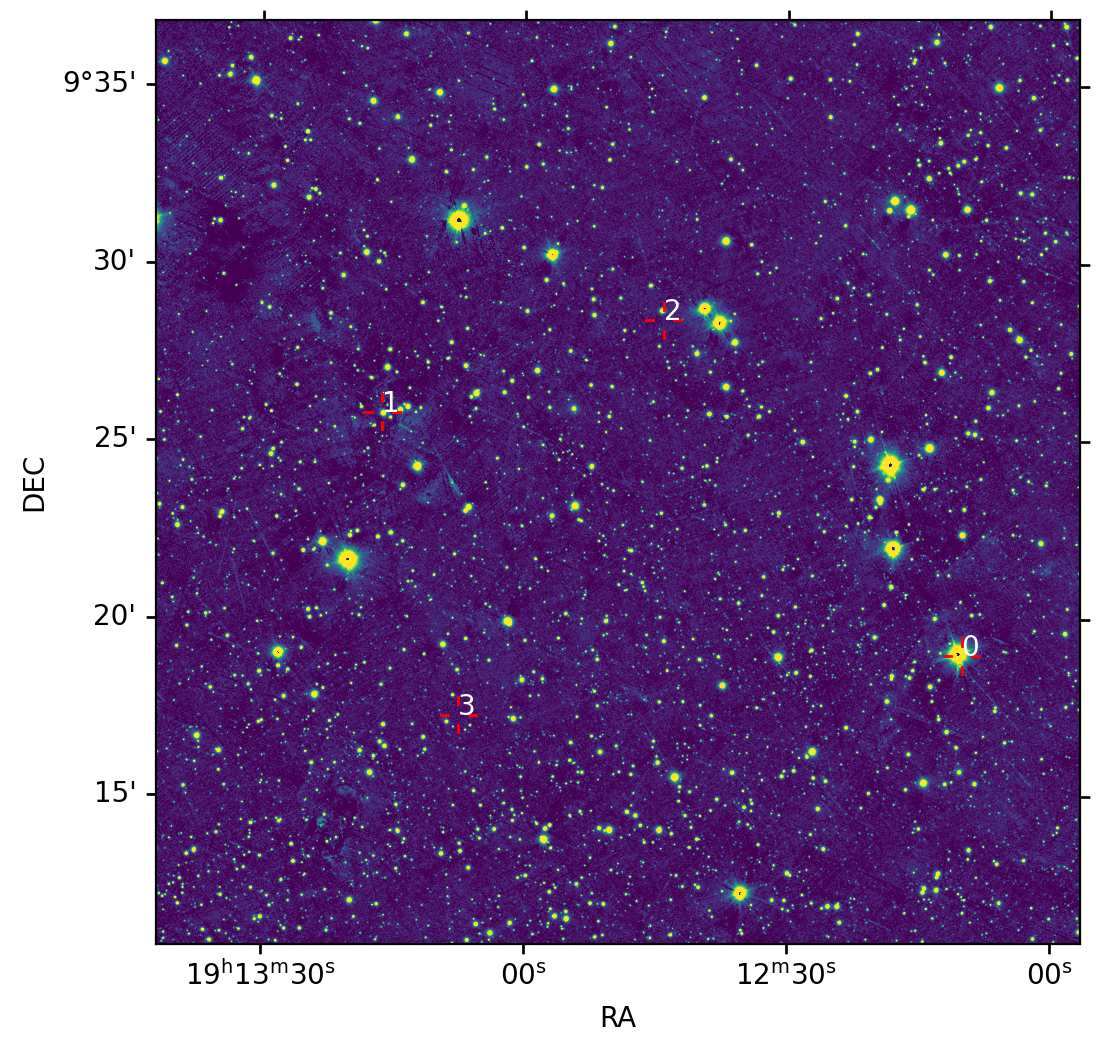

In [5]:
wcs = kete.irsa.plot_fits_image(frame, cmap='viridis', percentiles=(40, 99))
if len(sources) != 0:    
    for idx in range(len(sources)):
        kete.irsa.annotate_plot(wcs, sources[idx].ra, sources[idx].dec, style='+', text=f"{idx}")

## Initialize asteroid checker

In the next few blocks, we are going to find all the asteroids in the FOV of the image at a certain time and then cross match them with the sources. 

This fetches all the state information fromt the DB and creates the state objects

In [6]:
%%time
ac = AsteroidChecker() 

CPU times: user 5.38 s, sys: 484 ms, total: 5.86 s
Wall time: 6.55 s


## Get list of asteroids in the FOV on February 23, 2025

This step calculates the 

In [7]:
%%time
jd = kete.Time.from_ymd(2025, 2, 23).jd # We are spoofing the date - this could be the original date the image was taken too.
asteroid_list, designation_list = ac.get_asteroid_list(wcs, jd)
asteroid_list, designation_list

288.20577786757485 9.39747174930855
Found 1 w/in 80.0 arcmin, running full n-body on those...
CPU times: user 2.75 s, sys: 200 ms, total: 2.95 s
Wall time: 2.58 s


(<SkyCoord (ICRS): (ra, dec) in deg
     [(288.283385, 9.28854864)]>,
 ['2020 HS4'])

[None, None, None, '2020 HS4']
CPU times: user 1.48 s, sys: 90.1 ms, total: 1.57 s
Wall time: 1.55 s


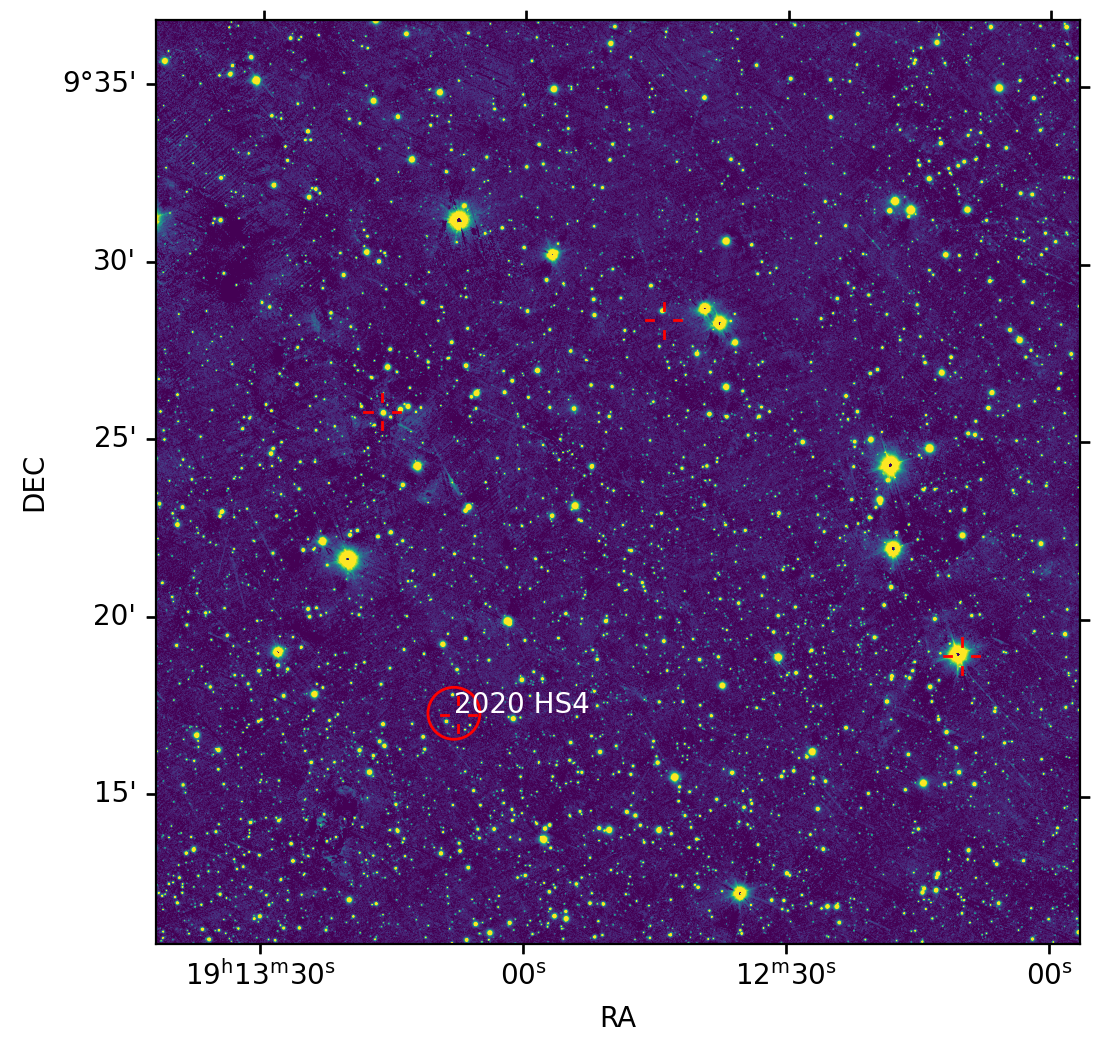

In [8]:
%%time
wcs = kete.irsa.plot_fits_image(frame, cmap='viridis', percentiles=(40, 99))

    
for idx in range(len(sources)):
    kete.irsa.annotate_plot(wcs, sources[idx].ra, sources[idx].dec, style='+')

if len(asteroid_list) != 0:
    
    matches = ac.cross_match_sources_with_asteroids(asteroid_list, designation_list, sources)
    print(matches)
    
    for idx in range(len(asteroid_list)):
        kete.irsa.annotate_plot(wcs, asteroid_list[idx].ra, asteroid_list[idx].dec, style='o', text=designation_list[idx])

## Get list of asteroids in the FOV on February 23, 2025 + 0.33 day

In [9]:
%%time
jd = kete.Time.from_ymd(2025, 2, 23).jd + 0.33 # We are spoofing the date - this could be the original date the image was taken too.
asteroid_list, designation_list = ac.get_asteroid_list(wcs, jd)
asteroid_list, designation_list

288.20577786757485 9.39747174930855
Found 1 w/in 80.0 arcmin, running full n-body on those...
CPU times: user 3.06 s, sys: 122 ms, total: 3.18 s
Wall time: 2.51 s


(<SkyCoord (ICRS): (ra, dec) in deg
     [(288.3713576, 9.3358832)]>,
 ['2020 HS4'])

[None, None, None, None]
CPU times: user 1.48 s, sys: 91 ms, total: 1.57 s
Wall time: 1.56 s


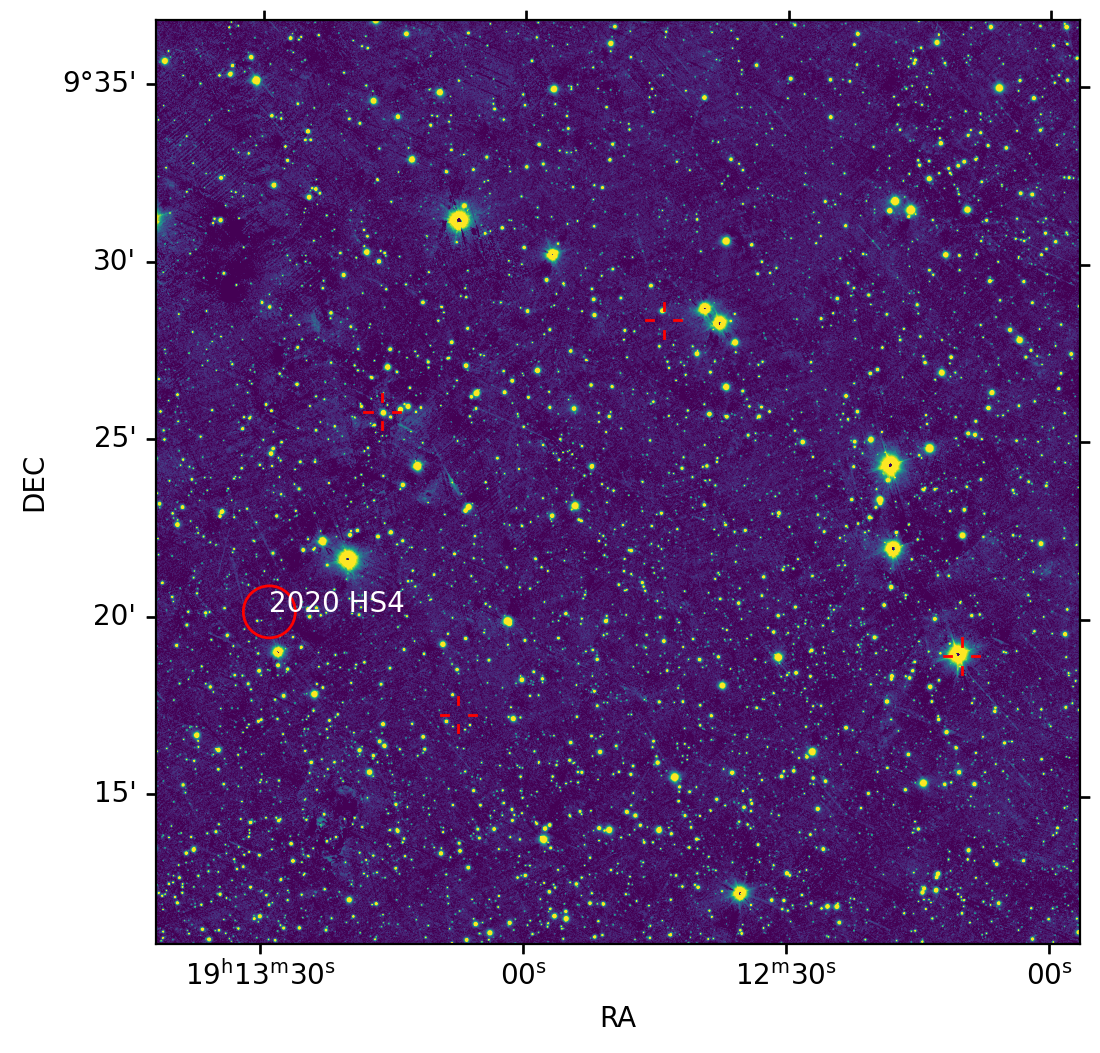

In [10]:
%%time
wcs = kete.irsa.plot_fits_image(frame, cmap='viridis', percentiles=(40, 99))

for idx in range(len(sources)):
    kete.irsa.annotate_plot(wcs, sources[idx].ra, sources[idx].dec, style='+')

if len(asteroid_list) != 0:
    
    matches = ac.cross_match_sources_with_asteroids(asteroid_list, designation_list, sources)
    print(matches)
    
    for idx in range(len(asteroid_list)):
        kete.irsa.annotate_plot(wcs, asteroid_list[idx].ra, asteroid_list[idx].dec, style='o', text=designation_list[idx])        

## Get list of asteroids in the FOV on February 23, 2025 + 1 day

In [11]:
%%time
jd = kete.Time.from_ymd(2025, 2, 23).jd + 1 # We are spoofing the date - this could be the original date the image was taken too.
asteroid_list, designation_list = ac.get_asteroid_list(wcs, jd)
asteroid_list, designation_list

288.20577786757485 9.39747174930855
Found 1 w/in 80.0 arcmin, running full n-body on those...
CPU times: user 3.16 s, sys: 156 ms, total: 3.31 s
Wall time: 2.54 s


(<SkyCoord (ICRS): (ra, dec) in deg
     [(288.54928692, 9.43249005)]>,
 ['2020 HS4'])

[None, None, None, None]
CPU times: user 1.49 s, sys: 93.4 ms, total: 1.58 s
Wall time: 1.56 s


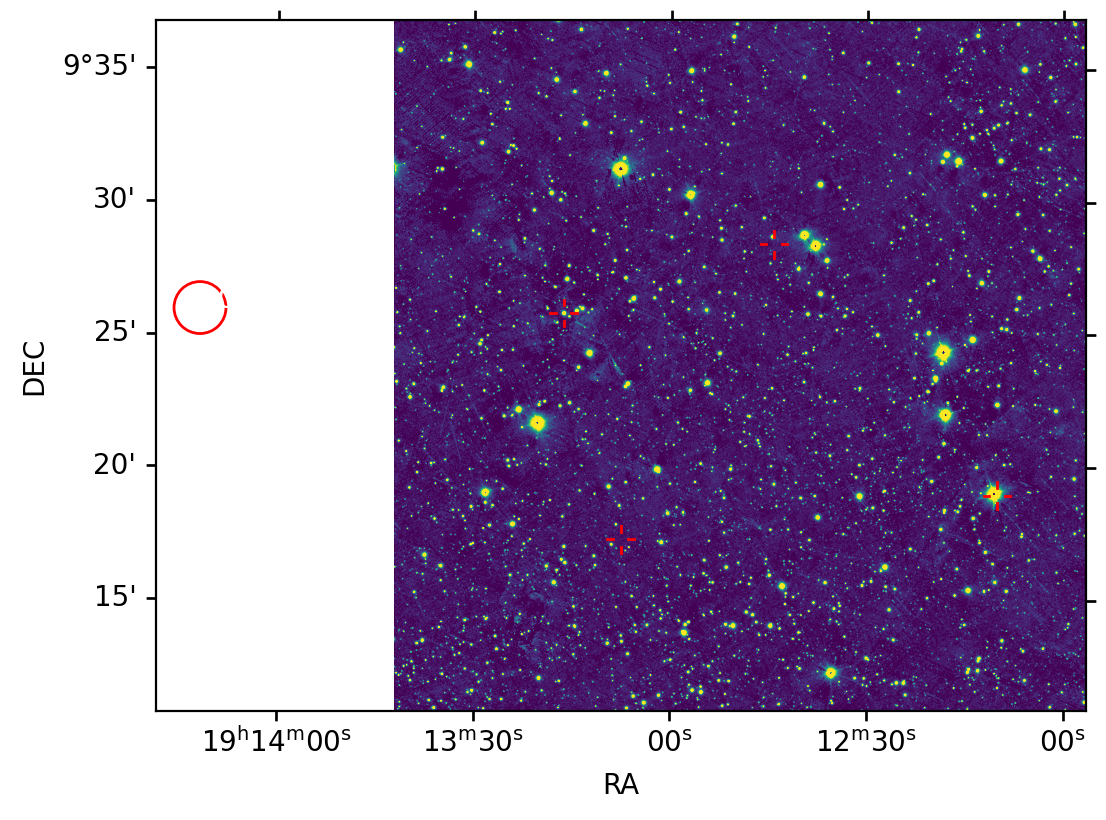

In [12]:
%%time
wcs = kete.irsa.plot_fits_image(frame, cmap='viridis', percentiles=(40, 99))

for idx in range(len(sources)):
    kete.irsa.annotate_plot(wcs, sources[idx].ra, sources[idx].dec, style='+')
        

if len(asteroid_list) != 0:
    
    matches = ac.cross_match_sources_with_asteroids(asteroid_list, designation_list, sources)
    print(matches)
    
    for idx in range(len(asteroid_list)):
        kete.irsa.annotate_plot(wcs, asteroid_list[idx].ra, asteroid_list[idx].dec, style='o', text=designation_list[idx])
    
